https://www.kaggle.com/datasets/adrianvinueza/gym-customers-features-and-churn/data

"It's necessary to implement an effective customer retention strategy through data analysis. The main goal is to predict the probability of customer churn for the next month, identify key customer profiles, and develop specific recommendations to improve customer retention and satisfaction. This will enable optimizing the customer experience and strengthening their loyalty."

#### Variables:
- **Gender** *(assuming 0 - male, 1 - female)*.
- **Near_Location** - if the user lives or works in the neighborhood where the gym is located *(assuming 0 - no, 1 - yes)*.
- **Partner** - if the user works in an associated company (the gym has associated companies whose employees get discounts; in those cases, the gym stores information about the clients' employers) *(assuming 0 - no, 1 - yes)*.
- **Promo_friends** - if the user originally signed up through a "bring a friend" offer (they used a friend's promotional code when they paid the first subscription) *(assuming 0 - no, 1 - yes)*.
- **Phone** - if the user provided their phone number *(assuming 0 - no, 1 - yes)*.
- **Contract_period**
- **Group_visits** - *(assuming 0 - no, 1 - yes)*
- **Age**
- **Avg_additional_charges_total**
- **Month_to_end_contract**
- **Lifetime** - the time (in months) since the user first arrived at the gym.
- **Avg_class_frequency_total**
- **Avg_class_frequency_current_month**
- **Churn** - cancellation for the current month *(assuming 0 - no, 1 - yes)*.

In [401]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import scipy.stats as stats

In [402]:
df = pd.read_csv("/Users/korneliakozaczewska/Desktop/chmurka/git/projects/gym_churn_us.csv")

## Data Overview

In [403]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [405]:
df = df.rename(columns={"gender" : "Gender", "Near_Location" : "Near_location"})

In [406]:
df.isnull().sum() # no null values

Gender                               0
Near_location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [407]:
df.duplicated().sum() # no duplicates

0

## Exploratory Data Analysis (EDA)

In [408]:
df.describe()

,Gender,Near_location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- **Gender** - 51% of users are women.
- **Near_Location** - 84% of users live or works in the neighborhood where the gym is located.
- **Partner** - 48% of users work in an associated company.
- **Promo_friends** - 30% of users originally signed up through a "bring a friend" offer.
- **Phone** - 90% of users provided their phone number.
- **Contract_period** - average lenghts is 4.68 months.
- **Group_visits** - 41% of users did group visits.
- **Age** - average age is 29 years old.
- **Avg_additional_charges_total** - users' average is 146.
- **Month_to_end_contract** - average length is 4.32 months.
- **Lifetime** - average is 3.72 months.
- **Avg_class_frequency_total** - users' average is 1.87.
- **Avg_class_frequency_current_month** - users' average is 1.76.
- **Churn** - 26% of users want to cancel for the current month.

In [409]:
x = df.drop(columns="Churn") # all variables without churn
y = df["Churn"]
x_cy = df.drop(columns=["Age",
                       "Avg_additional_charges_total",
                       "Month_to_end_contract",
                       "Lifetime",
                       "Avg_class_frequency_total",
                       "Avg_class_frequency_current_month"],
              errors="ignore") # all categorical variables with churn
x_c = x_cy.drop(columns=["Churn"], errors="ignore") # all categorical variables without churn
x_n = x.drop(columns=x_cy.columns, errors="ignore") # all numerical variables without churn
x_ny = pd.concat([x_n, y], axis=1) # all numerical variables with churn


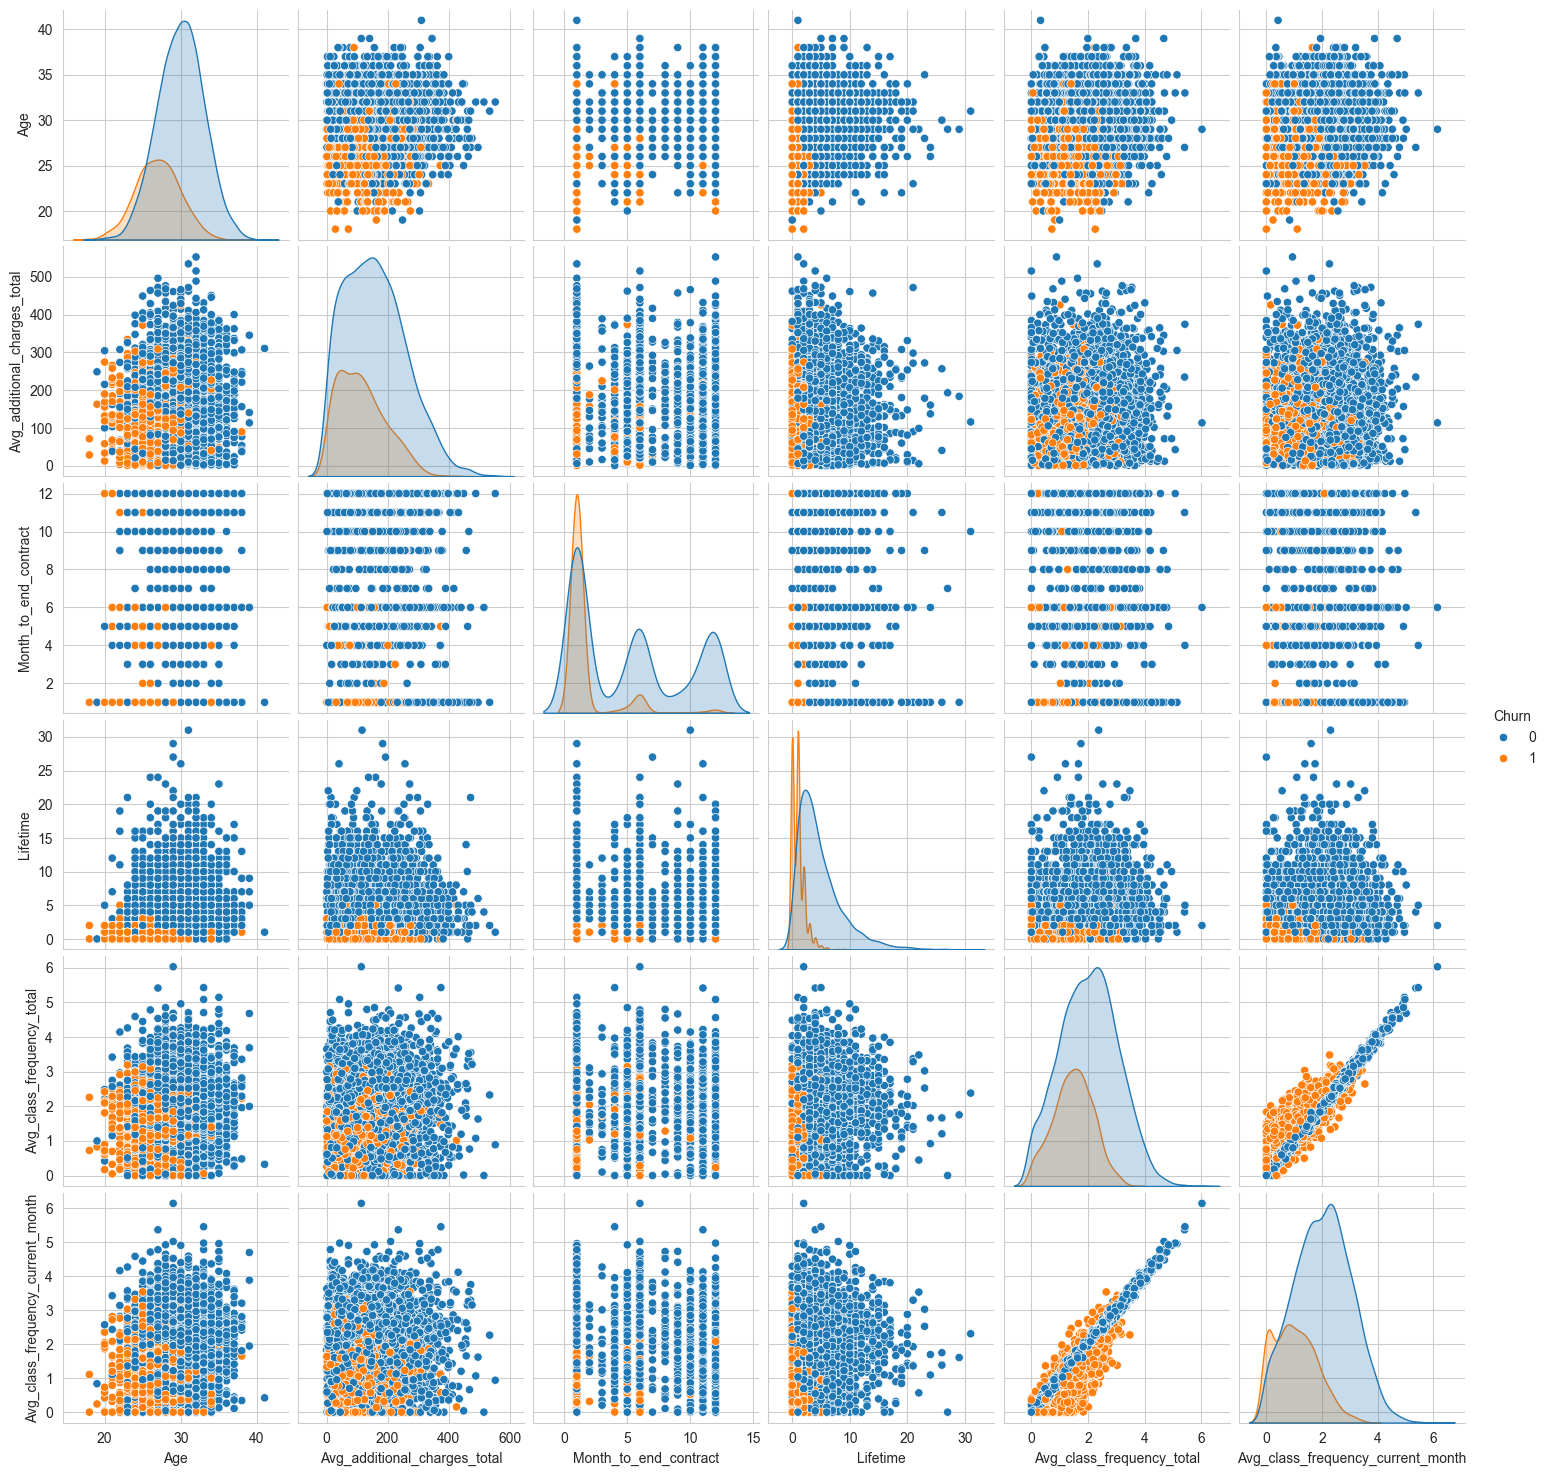

In [410]:
sns.pairplot(x_ny, hue="Churn")
plt.show()

Users that are closer to end of their contract (Month_to_end_contract) and those with shorter time since their first visit in the gym (Lifetime] seem to be more prone to churn. Younger (Age) and users with smaller average class frequency for the current month (Avg_class_frequency_current_month) as well.

There also seem to be a mild correlation between Avg_class_frequency_current_month and Avg_class_frequency_total.

## Statistical testing

In [411]:
median_by_churn = df.groupby("Churn")[x_n.columns].median().T
median_by_churn

Churn,0,1
Age,30.000000,27.000000
Avg_additional_charges_total,149.881171,103.814686
Month_to_end_contract,6.000000,1.000000
Lifetime,4.000000,1.000000
Avg_class_frequency_total,2.043252,1.491187
Avg_class_frequency_current_month,2.046697,0.979445


In [412]:
results = []
for col in x_n.columns:
    w, pvalue = stats.shapiro(df[col])
    results.append([w, pvalue])
results_df = pd.DataFrame(results, index=[x_n.columns], columns=["w", "p-value"])
results_df

,w,p-value
Age,0.991515,1.018004e-14
Avg_additional_charges_total,0.963122,8.667115e-31
Month_to_end_contract,0.740261,6.537167e-62
Lifetime,0.816842,1.607944e-55
Avg_class_frequency_total,0.991272,5.735722e-15
Avg_class_frequency_current_month,0.982500,7.539839e-22


Data is not normally distributed (p-value < .05 for all variables) so we use Mann-Whitney U test to compare medians in independent groups with Bonferroni correction for the number of tests.

In [413]:
results = []
for col in x_n.columns:
    g0 = df.loc[df["Churn"] == 0, col]
    g1 = df.loc[df["Churn"] == 1, col]
    stat, pvalue = stats.mannwhitneyu(x=g0, y=g1, alternative="two-sided")
    results.append([stat, pvalue])
results_df = pd.DataFrame(results, index=[x_n.columns], columns=["stat", "p-value"])
results_df

,stat,p-value
Age,2374707.5,2.504703e-142
Avg_additional_charges_total,1949479.0,9.849515e-34
Month_to_end_contract,2295553.0,1.924333e-139
Lifetime,2737108.0,1.580517e-297
Avg_class_frequency_total,2075227.0,1.166344e-57
Avg_class_frequency_current_month,2416199.0,1.110541e-155


Results from the Mann–Whitney U tests indicate that the medians of all examined variables differ significantly between the retained and churned groups. In particular, users who ended up churning tend to have:
- fewer months remaining on their contract,
- shorter customer lifetime (time since their first visit),
- younger age,
- and lower average class frequency in the current month.

This that not necessarily mean that other variables don't statistically differ between groups, but those seem to differ the most. Also, these associations don't imply that any of those factors directly cause churn (only likelihood is higher in users with these characteristics).

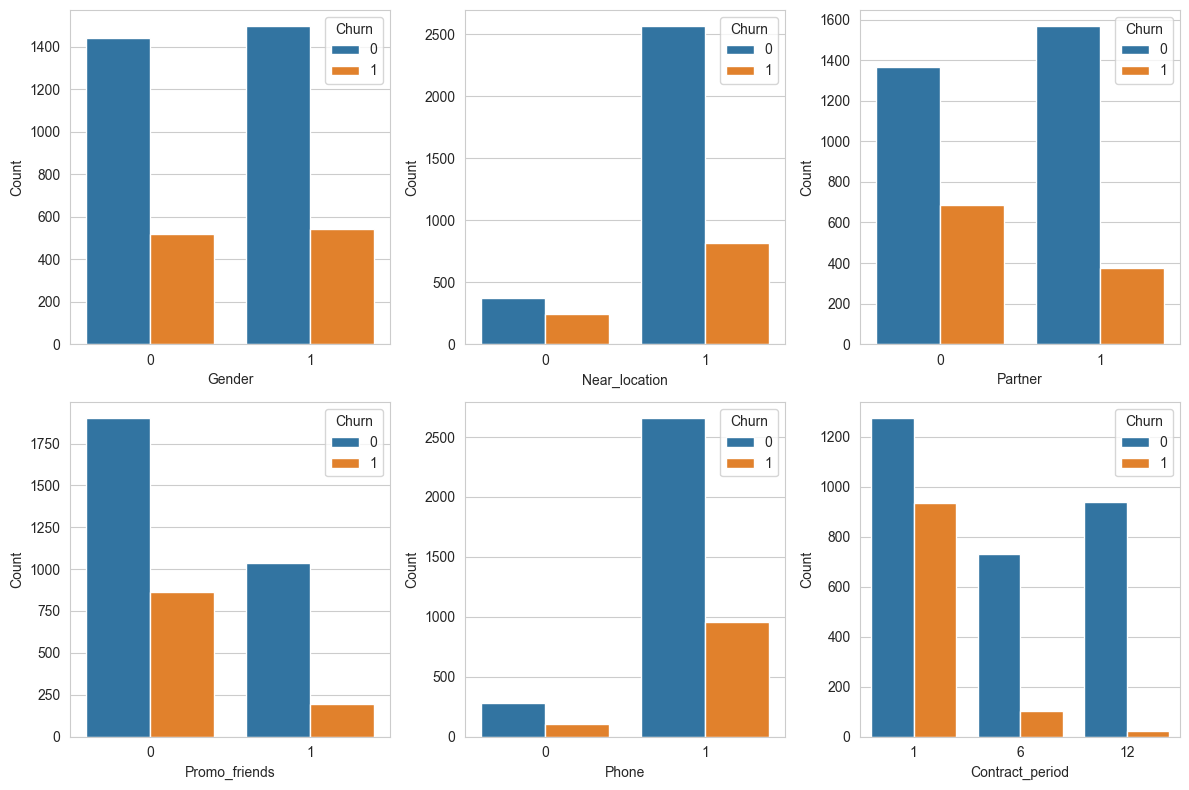

In [414]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, col in zip(axes.flat, x_c):
    sns.countplot(
        data=x_cy,
        x=col,
        hue="Churn",
        ax=ax,
        dodge=True,
    )
    ax.set_ylabel("Count")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


Users with the gym nearby (Near_location), who work in associated company (Partner), who provided their phone number (Phone) and those with shorter contract period (Contract_period) seem to be more likely to churn. We'll check that with the Chi-Squared test.

In [415]:
results = []
for col in x_c.columns:
    table = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    results.append([chi2, p, dof, expected])
results_df = pd.DataFrame(results, index=x_c.columns, columns=["chi2", "p-value", "df", "expected"])
results_df

,chi2,p-value,df,expected
Gender,0.000080,9.928687e-01,1,"[[1439.37525, 519.62475], [1499.62475, 541.375..."
Near_location,64.836532,8.137638e-16,1,"[[454.81025, 164.18975], [2484.18975, 896.81025]]"
Partner,99.123273,2.372636e-23,1,"[[1508.44175, 544.55825], [1430.55825, 516.441..."
Promo_friends,104.484146,1.584562e-24,1,"[[2032.3185, 733.6815], [906.6815, 327.3185]]"
Phone,0.000190,9.890158e-01,1,"[[283.6135, 102.3865], [2655.3865, 958.6135]]"
Contract_period,653.555219,1.208613e-142,2,"[[1621.59325, 585.40675], [612.04675, 220.9532..."
Group_visits,122.149457,2.140874e-28,1,"[[1727.39725, 623.60275], [1211.60275, 437.397..."


Chi-Squared tests indicate that all categorical variables, except "Gender" and "Phone", show statistically significant differences in churned and non-churned groups. The strongest difference we find is in the length of the contract period.

Now, we'll see how much information about our users (churned vs non-churned) each variable gives us.

## Entropy

In [416]:
probs = df["Churn"].value_counts(normalize=True)
H_parent = stats.entropy(probs, base=2) # entropy of whole dataset
H_parent


0.8345658024116291

In [ ]:
results = []
for col in x_c.columns:
    table = pd.crosstab(x[col], df["Churn"])
    cond_probs = table.div(table.sum(axis=1), axis=0) # dividing each element by sum for X == x (cond_prob for X)
    H_children = cond_probs.apply(lambda row: stats.entropy(row, base=2), axis=1) # H(Churn | X == x)
    weights = table.sum(axis=1) / table.values.sum() # p(X == x) for whole dataset
    H_cond = (weights * H_children).sum()
    IG = H_parent - H_cond
    results.append(IG)
results_c_df = pd.DataFrame(results, columns=["Information gain"], index=[x_c.columns])

results = []
for col in x_n.columns:
    bins = pd.cut(df[col], bins=2) # splitting numerical data into two categories
    table = pd.crosstab(bins, df["Churn"])
    cond_prob = table.div(table.sum(axis=1), axis=0)
    H_children = cond_probs.apply(lambda row: stats.entropy(row, base=2), axis=1)
    weights = table.sum(axis=1) / table.values.sum()
    H_cond = (weights * H_children).sum()
    IG = H_parent - H_cond
    results.append(IG)
results_n_df = pd.DataFrame(results, columns=["Information gain"], index=[x_n.columns])

results_df = pd.concat([results_c_df, results_n_df], axis=0)
results_df.sort_values(by="Information gain", ascending=False)

,Information gain
Age,8.345658e-01
Avg_additional_charges_total,8.345658e-01
Month_to_end_contract,8.345658e-01
Lifetime,8.345658e-01
Avg_class_frequency_total,8.345658e-01
Avg_class_frequency_current_month,8.345658e-01
Contract_period,1.399844e-01
Group_visits,2.298170e-02
Promo_friends,2.027537e-02
Partner,1.822507e-02


Based on information gain that each variable provided us with, we see that Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total and Avg_class_frequency_current_month are the strongest predictors of churn in this dataset. Moreover their IG seems to be equal to H_parent meaning knowing the value of any of those variables removes all uncertainty whether the user will churn in the current month or not.

Phone and Gender bring almost no information (which was confirmed by Chi-Squared tests). We'll be dropping those two variables in next steps.